# Compare the evolution of vegetation in two distinct part of a field


> 👋 Before moving on with this demo, you must first sign-up and request your Geosys APIs credentials here :
> - ⚙️[Try it now](https://www.earthdaily.com/geosys/geosys-api/)

> For more information about our Geosys APIs : 
> - 📚 [Geosys APIs to connect with your digital ag application](https://www.earthdaily.com/geosys/geosys-api/)


> **Demo Project:** This demo demonstrates the ability to generate MR times series with GeosysPy for a given geometry and a sub-entity of this geometry and compare them between each other.



### @author: Geosys



 ## 1️⃣ Import all librairies needed and get an autorization to use SubEntityAnalysis

In [1]:
import sys
import os
sys.path.append(os.path.join('..','src'))
from geosyspy import Geosys
from geosyspy.utils.constants import *
from dotenv import load_dotenv
from datetime import datetime
from dateutil.relativedelta import relativedelta
from sub_entity_analysis.sub_entity_analysis import SubEntityAnalysis
import datetime as dt
import logging

import matplotlib.pyplot as plt

logger = logging.getLogger()
logger.setLevel(logging.INFO)

# read .env file
load_dotenv()

API_CLIENT_ID = os.getenv('API_CLIENT_ID')
API_CLIENT_SECRET = os.getenv('API_CLIENT_SECRET')
API_USERNAME = os.getenv('API_USERNAME')
API_PASSWORD = os.getenv('API_PASSWORD')

# create the client
client = SubEntityAnalysis(API_CLIENT_ID, API_CLIENT_SECRET, API_USERNAME, API_PASSWORD, Env.PROD, Region.NA)

INFO:root:Authenticated


 ## 2️⃣ Input data

These input parameters are utilized in the demo to generate MR times series
for a given geometry and a sub-entity of this geometry and compare them between each other.
The input data for this example consists of the following parameters:

##### polygon: 
A polygon string in WKT format. This polygon defines the boundaries of the main area under analysis.

##### sub_polygon: 
A polygon string in WKT format. This sub_polygon defines the boundaries of the sub entity area under analysis.

#### start_date: 
A datetime object representing the start date of generated time series. In this case, the start date is 12 months ago from today.

#### end_date: 
A datetime object representing the end date of generated time series. In this case, the end date is today.

#### indicator: 
A string value representing the index indicator on wich the analysis is made. In this case, the indicator is **ndvi**.
Possible values for indicator are:
- ndvi
- evi
- gndvi
- ndwi
- cvi
- cvin
- lai



In [2]:
polygon = "POLYGON((-90.41169914 41.66631642, -90.41178502 41.6545818, -90.37753855 41.65413284, -90.37788188 41.666059940000004, -90.41169914 41.66631642))"

sub_polygon = "POLYGON((-90.39620670000001 41.66067377, -90.39623734 41.661004840000004, -90.39632852 41.66132771, -90.396478 41.661634480000004, -90.39668209 41.66191756, -90.39693578 41.6621701, -90.39723276000001 41.662385730000004, -90.39756577 41.66255921, -90.39792662 41.66268625, -90.39830643 41.662763760000004, -90.39869585 41.66278987, -90.39908518 41.662763760000004, -90.39946498 41.66268625, -90.39982584 41.66255921, -90.40015884 41.662385730000004, -90.40045592 41.6621701, -90.40070951 41.66191756, -90.40091361 41.661634480000004, -90.40106309000001 41.66132771, -90.40115427 41.661004840000004, -90.4011849 41.66067377, -90.40115427 41.66034277, -90.40106309000001 41.66001989, -90.40091361 41.65971311, -90.40070951 41.659429960000004, -90.40045592 41.659177480000004, -90.40015884 41.65896184, -90.39982584 41.65878835, -90.39946498 41.65866123, -90.39908518 41.65858372, -90.39869585 41.65855767, -90.39830643 41.65858372, -90.39792662 41.65866123, -90.39756577 41.65878835, -90.39723276000001 41.65896184, -90.39693578 41.659177480000004, -90.39668209 41.659429960000004, -90.396478 41.65971311, -90.39632852 41.66001989, -90.39623734 41.66034277, -90.39620670000001 41.66067377))"

end_date = dt.date.today()

start_date = end_date + relativedelta(months=-12)

indicator = "ndvi"

## 3️⃣ Get the cumulative indicator value over the defined period for the main polygon
Get the indicator values by pixel over the defined period for the main polygon and compute cumulative value. 

### Get the indicator index values by pixel over the defined period for the main polygon

In [3]:
polygon_ds = client.get_satellite_image_time_series_indicator(polygon, start_date, end_date, indicator)
polygon_ds

INFO:root:Calling APIs for coverage
INFO:root:interpolating IKc73hpUQ6uonRnbIM4MxYiKt26L8Wn8J8ZNNCKdfnQ to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid


The highest resolution's image grid size is (288, 149)


INFO:root:interpolating IKc73hpUQ6v7C5jqHvsMM8Gi43ESyfXPNVcskBaGGU0 to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vMxmdSqvD4FNeCVByyIHlxKgTvbjrIKTk to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vXTal2m5FomS137JjHE8EH1Vdw6yJ5IXM to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vcjXH4tC8597iKX0tswCZ6r6C8aPXzSC4 to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vhzSO7CZeysrP7bCl5eRhV6KwwIjVXHt6 to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vkcQSX5Mib7Gv1vWEfqAeeOD5Hz9okxfw to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vnFNy9RrdfUuQk7EO61xsVeiQJ6gH8mfc to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vxlDxj6fTZXE8uWhDbcqn5s03kWRvS0Ky to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating 

<xarray.Dataset>
Dimensions:                  (band: 1, y: 149, x: 288, time: 36)
Coordinates:
  * band                     (band) <U4 'ndvi'
  * y                        (y) float64 41.67 41.67 41.67 ... 41.65 41.65 41.65
  * x                        (x) float64 -90.41 -90.41 -90.41 ... -90.38 -90.38
  * time                     (time) datetime64[ns] 2022-06-22 ... 2023-06-19
    image.id                 (time) <U43 'IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4Act...
    image.sensor             (time) <U10 'SENTINEL_2' ... 'LANDSAT_8'
    image.soilMaterial       (time) <U10 'VEGETATION' ... 'VEGETATION'
    image.spatialResolution  (time) float64 10.0 10.0 10.0 ... 15.0 15.0 15.0
    image.weather            (time) <U4 'DRY' 'DRY' 'DRY' ... 'DRY' 'DRY' 'DRY'
    crs                      (time) <U9 'EPSG:4326' 'EPSG:4326' ... 'EPSG:4326'
Data variables:
    ndvi                     (time, band, y, x) float64 nan nan nan ... nan nan

### Compute the cumulative index value over the defined period for the main polygon from last result 

In [4]:
cumulative_polygon_da = client.get_cumulative_index_calculation(polygon_ds, indicator)
cumulative_polygon_da

<xarray.DataArray 'ndvi' (time: 36, band: 1)>
array([[ 0.66759695],
       [ 1.33467798],
       [ 2.0423424 ],
       [ 2.80300152],
       [ 3.71753962],
       [ 4.60841847],
       [ 5.51904014],
       [ 6.41047032],
       [ 7.31898152],
       [ 8.04421425],
       [ 8.7130357 ],
       [ 9.26968395],
       [ 9.8046194 ],
       [10.3093219 ],
       [10.75193016],
       [11.11458349],
       [11.45101026],
       [11.78581189],
       [12.07797236],
       [12.38308904],
       [12.65021378],
       [12.91761771],
       [13.11569977],
       [13.31588212],
       [13.5319576 ],
       [13.73991254],
       [13.96540188],
       [14.21973544],
       [14.46914025],
       [14.71878093],
       [14.9918431 ],
       [15.25404001],
       [15.52879811],
       [15.84057053],
       [16.35564021],
       [16.94542425]])
Coordinates:
  * band                     (band) <U4 'ndvi'
  * time                     (time) datetime64[ns] 2022-06-22 ... 2023-06-19
    image.id                 (time) <U43 'IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4Act...
    image.sensor             (time) <U10 'SENTINEL_2' ... 'LANDSAT_8'
    image.soilMaterial       (time) <U10 'VEGETATION' ... 'VEGETATION'
    image.spatialResolution  (time) float64 10.0 15.0 10.0 ... 15.0 10.0 15.0
    image.weather            (time) <U4 'DRY' 'DRY' 'DRY' ... 'DRY' 'DRY' 'DRY'
    crs                      (time) <U9 'EPSG:4326' 'EPSG:4326' ... 'EPSG:4326'

## 4️⃣ Get the indicator index values by pixel over the defined period for the sub polygon
Get the indicator index values by pixel over the defined period for the sub polygon and compute cumulative value. 

### Get the indicator index values by pixel over the defined period for the sub polygon

In [5]:
sub_polygon_ds = client.get_satellite_image_time_series_indicator(sub_polygon, start_date, end_date, indicator)
sub_polygon_ds

INFO:root:Calling APIs for coverage
INFO:root:interpolating IKc73hpUQ6uonRnbIM4MxYiKt26L8Wn8J8ZNNCKdfnQ to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6v7C5jqHvsMM8Gi43ESyfXPNVcskBaGGU0 to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vF4wLnqb02VZ7qUSpLiclSQRCXKt8vtLQ to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vMxmdSqvD4FNeCVByyIHlxKgTvbjrIKTk to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vXTal2m5FomS137JjHE8EH1Vdw6yJ5IXM to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vcjXH4tC8597iKX0tswCZ6r6C8aPXzSC4 to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vhzSO7CZeysrP7bCl5eRhV6KwwIjVXHt6 to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6vkcQSX5Mib7Gv1vWEfqAeeOD5Hz9okxfw to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8C

The highest resolution's image grid size is (42, 49)


INFO:root:interpolating IKc73hpUQ6xRkIor7RpvMOrhEJ0CLYCjnfI3Hzz0f7U to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6xcG60RGMY011EUubKWKX3GSUSwPlSEMku to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6xhVziTgRAdFeFBfRkhfAVn65YXvWcjoWa to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6xpOqT8cfpRrm6N80g7u6bwCD0nBOr3xbA to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6umh3rjDRefo9sFB0tJQF387ZPwGO4SwCq to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6urQEMbqNnAGy3XCpSl8uKA692gsWAY49M to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6uzpfWWYcDCzZ79vop8GwOkqtObGRDMAnU to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating IKc73hpUQ6v7ieVZ8TYhQNgY5sWFpWmYZKkleKo6f7U to IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4ActeG8CJ2Tk's grid
INFO:root:interpolating 

<xarray.Dataset>
Dimensions:                  (band: 1, y: 49, x: 42, time: 39)
Coordinates:
  * band                     (band) <U4 'ndvi'
  * y                        (y) float64 41.66 41.66 41.66 ... 41.66 41.66 41.66
  * x                        (x) float64 -90.4 -90.4 -90.4 ... -90.4 -90.4 -90.4
  * time                     (time) datetime64[ns] 2022-06-22 ... 2023-06-19
    image.id                 (time) <U43 'IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4Act...
    image.sensor             (time) <U10 'SENTINEL_2' ... 'LANDSAT_8'
    image.soilMaterial       (time) <U10 'VEGETATION' ... 'VEGETATION'
    image.spatialResolution  (time) float64 10.0 10.0 10.0 ... 15.0 15.0 15.0
    image.weather            (time) <U4 'DRY' 'DRY' 'DRY' ... 'DRY' 'DRY' 'DRY'
    crs                      (time) <U9 'EPSG:4326' 'EPSG:4326' ... 'EPSG:4326'
Data variables:
    ndvi                     (time, band, y, x) float64 nan nan nan ... nan nan

### Compute the cumulative index value over the defined period for the Sub polygon

In [6]:
cumulative_sub_polygon_da = client.get_cumulative_index_calculation(sub_polygon_ds, indicator)
cumulative_sub_polygon_da

<xarray.DataArray 'ndvi' (time: 39, band: 1)>
array([[ 0.4305066 ],
       [ 0.86661475],
       [ 1.38072581],
       [ 2.01402328],
       [ 2.93851877],
       [ 3.88329223],
       [ 4.83696662],
       [ 5.78526586],
       [ 6.71359785],
       [ 7.66409032],
       [ 8.421157  ],
       [ 9.15069596],
       [ 9.72658675],
       [10.27622369],
       [10.7711141 ],
       [11.18223221],
       [11.43817673],
       [11.68409782],
       [11.91861381],
       [12.11997312],
       [12.33211663],
       [12.52390517],
       [12.74797187],
       [12.89134377],
       [13.07060014],
       [13.26065465],
       [13.4650633 ],
       [13.65715163],
       [13.8520872 ],
       [14.0657376 ],
       [14.27742055],
       [14.48163715],
       [14.67920521],
       [14.8987901 ],
       [15.11561531],
       [15.38192942],
       [15.69294441],
       [16.28548748],
       [16.98753453]])
Coordinates:
  * band                     (band) <U4 'ndvi'
  * time                     (time) datetime64[ns] 2022-06-22 ... 2023-06-19
    image.id                 (time) <U43 'IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4Act...
    image.sensor             (time) <U10 'SENTINEL_2' ... 'LANDSAT_8'
    image.soilMaterial       (time) <U10 'VEGETATION' ... 'VEGETATION'
    image.spatialResolution  (time) float64 10.0 15.0 10.0 ... 15.0 10.0 15.0
    image.weather            (time) <U4 'DRY' 'DRY' 'DRY' ... 'DRY' 'DRY' 'DRY'
    crs                      (time) <U9 'EPSG:4326' 'EPSG:4326' ... 'EPSG:4326'

## 5️⃣ Compute the percentage deviation between the 2 cumulative data array 

Calculate and display the percentage deviation.

In [7]:
percentage_deviation = client.get_deviation_percentage(cumulative_polygon_da, cumulative_sub_polygon_da)
percentage_deviation

<xarray.DataArray 'ndvi' (time: 36, band: 1)>
array([[35.51399505],
       [35.06937538],
       [32.39498864],
       [28.14762079],
       [20.95528042],
       [15.73481764],
       [12.35855341],
       [-4.72863168],
       [-4.71525709],
       [-4.68588652],
       [-5.02305138],
       [-4.92900082],
       [-4.81002139],
       [-4.47936542],
       [-4.00209117],
       [-2.91142933],
       [-2.03551966],
       [-1.12679486],
       [-0.34774681],
       [ 0.41162918],
       [ 0.99847015],
       [ 1.31329046],
       [ 1.71059118],
       [ 0.41474892],
       [ 0.49434313],
       [ 0.60233945],
       [ 0.81139574],
       [ 1.08298669],
       [-0.08636936],
       [ 0.26887908],
       [ 0.62069085],
       [ 0.90746253],
       [ 0.94578274],
       [ 0.93194949],
       [ 0.42892069],
       [-0.24850532]])
Coordinates:
  * band                     (band) <U4 'ndvi'
  * time                     (time) datetime64[ns] 2022-06-22 ... 2023-06-19
    image.id                 (time) <U43 'IKc73hpUQ6umAUtgFL8DuvXVBJ3G6zi4Act...
    image.sensor             (time) <U10 'SENTINEL_2' ... 'LANDSAT_8'
    image.soilMaterial       (time) <U10 'VEGETATION' ... 'VEGETATION'
    image.spatialResolution  (time) float64 10.0 15.0 10.0 ... 15.0 10.0 15.0
    image.weather            (time) <U4 'DRY' 'DRY' 'DRY' ... 'DRY' 'DRY' 'DRY'
    crs                      (time) <U9 'EPSG:4326' 'EPSG:4326' ... 'EPSG:4326'

##  6️⃣ Display the results
Visualize the results using matplotlib by displaying the 2 cumulative index indicator values over the defined period.

Text(0.5, 1.0, 'NDVI cumul comparison between 2 geometries')

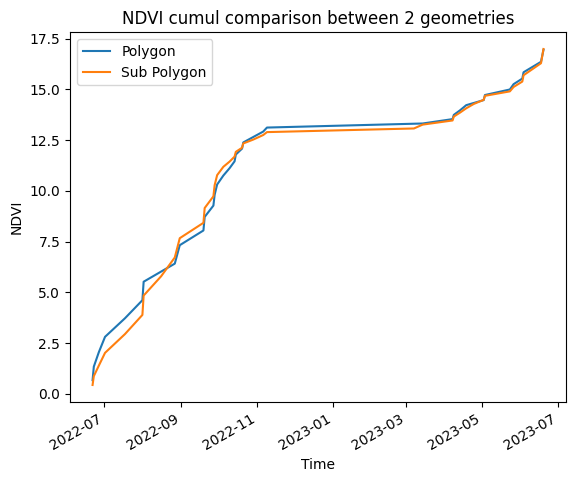

In [8]:
# Figure & sub graphics creation
fig, ax = plt.subplots()

# First graph creation
cumulative_polygon_da.plot.line(x='time', ax=ax, label='Polygon')

# Second graph creation
cumulative_sub_polygon_da.plot.line(x='time', ax=ax, label='Sub Polygon')

# legend creation
ax.legend()

# Add labels & title 
label = indicator.upper()
ax.set_xlabel('Time')
ax.set_ylabel(label)
ax.set_title(f'{label} cumul comparison between 2 geometries')